In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df

/home/arti/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/arti/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/arti/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/arti/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0, n_jobs=-1)
kmeans.fit(df)

/home/arti/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=3, n_jobs=-1, random_state=0)

In [3]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [4]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
result = df.groupby(['target', 'cluster'])['sepal_length'].count()
result

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit_transform(iris.data)

df['x'] = pca[:, 0]
df['y'] = pca[:, 1]
df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,x,y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,0,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,0,1.900942,0.116628


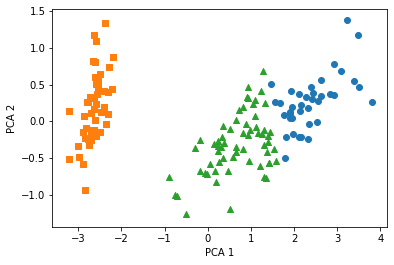

In [8]:
for i, mark in enumerate(['o', 's', '^']):
    j = df[df['cluster']==i].index
    plt.scatter(x=df.loc[j, 'x'], y=df.loc[j, 'y'], marker=mark)
    
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [34]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(x.shape, y.shape)

(200, 2) (200,)


In [35]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [36]:
df = pd.DataFrame(data=x, columns=['f1', 'f2'])
df['target'] = y
df

,f1,f2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


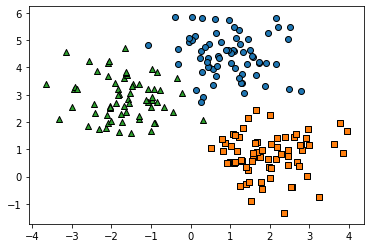

In [37]:
targets = np.unique(y)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in targets:
    cluster = df[df['target']==target]
    plt.scatter(x=cluster['f1'], y=cluster['f2'],
                edgecolor='k', marker=markers[target])
plt.show()

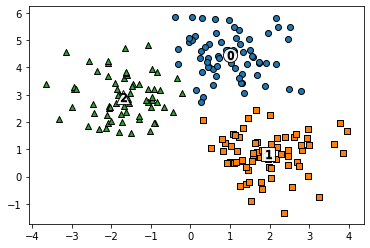

In [38]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
labels = kmeans.fit_predict(x)
df['labels'] = labels

centers = kmeans.cluster_centers_
uniques = np.unique(labels)

for label in uniques:
    cluster = df[df['labels']==label]
    center = centers[label]
    plt.scatter(x=cluster['f1'], y=cluster['f2'],
               edgecolors='k', marker=markers[label])
    
    plt.scatter(x=center[0], y=center[1], s=200, color='white',
               alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center[0], y=center[1], s=70, color='k',
               edgecolor='k', marker='$%d$' % label)
plt.show()
    

In [39]:
df.groupby('target')['labels'].value_counts()

target  labels
0       0         66
        2          1
1       1         67
2       2         65
        1          1
Name: labels, dtype: int64